Tensorflow:

1. End to end platform for machine learning
2. Write fast deep learning code in Python/other accessible languages
3. Able to access many pre built deep learning models

Why Tensorflow:

1. Easy Model Building
2. Robuts ML production anywhere
3. Powerful experimentation

In [56]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import time
print(tf.__version__)

2.15.0


Creating a simple regression data

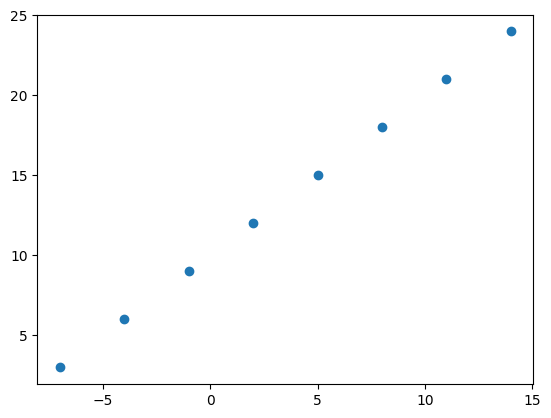

In [23]:
# Create input features
X = np.array([-7,-4,-1,2,5,8,11,14])

# Create Features
y = np.array([3,6,9,12,15,18,21,24])

# Create Visualizations
plt.scatter(X,y)

In [24]:
y == X+10

array([ True,  True,  True,  True,  True,  True,  True,  True])

In [27]:
X.shape,  y.shape

((8,), (8,))

In [28]:
house_info = tf.constant(["bedroom", "bathroom","garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [30]:
X[0], y[0]


(-7, 3)

In [48]:
X = tf.cast(tf.constant(X), dtype= tf.float32)
y = tf.cast(tf.constant(y), dtype = tf.float32 )

X.shape, y.shape

(TensorShape([8]), TensorShape([8]))

Steps in modeling with Tensorflow:

1. Creating a model
2. Compiling a model
3. Fitting a model

In [67]:
tf.random.set_seed(42)
# Create a model  using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compile the model

model.compile(loss= tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])

# Reshape X to have two dimensions
X_reshaped = tf.reshape(X, (-1, 1))  # Assuming you have one feature per sample

# Fit the model with the reshaped input data
start = time.time()
model.fit(X_reshaped, y, epochs=10)
end = time.time()
print(f"Total training time: {(end-start)/60} minutes")



Epoch 1/10
1/1 [==============================] - 1s 559ms/step - loss: 11.0199 - mae: 11.0199
Epoch 2/10
1/1 [==============================] - 0s 18ms/step - loss: 10.8874 - mae: 10.8874
Epoch 3/10
1/1 [==============================] - 0s 14ms/step - loss: 10.7549 - mae: 10.7549
Epoch 4/10
1/1 [==============================] - 0s 14ms/step - loss: 10.6224 - mae: 10.6224
Epoch 5/10
1/1 [==============================] - 0s 12ms/step - loss: 10.4899 - mae: 10.4899
Epoch 6/10
1/1 [==============================] - 0s 21ms/step - loss: 10.3574 - mae: 10.3574
Epoch 7/10
1/1 [==============================] - 0s 15ms/step - loss: 10.2249 - mae: 10.2249
Epoch 8/10
1/1 [==============================] - 0s 16ms/step - loss: 10.0924 - mae: 10.0924
Epoch 9/10
1/1 [==============================] - 0s 9ms/step - loss: 9.9599 - mae: 9.9599
Epoch 10/10
1/1 [==============================] - 0s 13ms/step - loss: 9.8274 - mae: 9.8274
Total training time: 0.01929341952006022 minutes


In [40]:
X.shape, y.shape

(TensorShape([8]), TensorShape([8]))

Try and make a prediction using our model

In [62]:
model.predict([17])

1/1 [==============================] - 0s 123ms/step


array([[20.802097]], dtype=float32)

Improving our model

In [ ]:
tf.random.set_seed(42)
# Create a model  using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

# Compile the model

model.compile(loss= tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(learning_rate = 1e-3),
              metrics = ["mae"])

# Reshape X to have two dimensions
X_reshaped = tf.reshape(X, (-1, 1))  # Assuming you have one feature per sample

# Fit the model with the reshaped input data
start = time.time()
model.fit(X_reshaped, y, epochs=150)
end = time.time()
print(f"Total training time: {(end-start)/60} minutes")



In [76]:
model.predict([12])

1/1 [==============================] - 0s 45ms/step


array([[21.877005]], dtype=float32)

Evaluating a tensorflow model

In [77]:
X = tf.range(-100,100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [78]:
y = X + 10

In [79]:
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

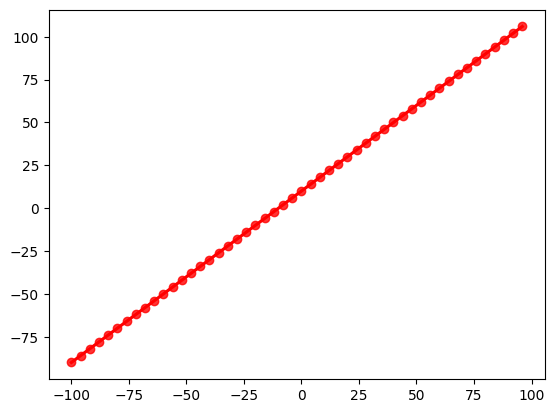

In [90]:
sns.regplot(x=X, y=y, color = "red")

# Show the plot
plt.show()

The 3 sets:
1. Training set: The model learns from this data, which is typically 70 to 80 % of the data
2. Validation set: The model gets tuned in this data, whch is typically 10 to 15 % of the data
3. Testing set: The model gets evaluated on this data to test what it has learned, this set is typically 10-15% of the total data available

In [91]:
X_train = X[:40]
y_train = y[:40]

X_test = X[40:]
y_test = y[40:]

len(X_train), len(X_test)

(40, 10)

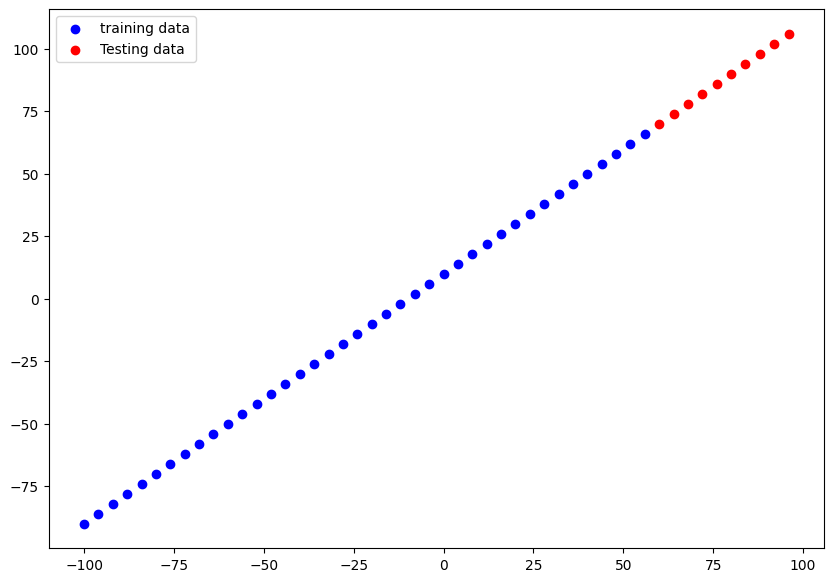

In [92]:
plt.figure(figsize = (10,7))
plt.scatter(X_train, y_train, c= "b", label = "training data")
plt.scatter(X_test, y_test, c="r", label ='Testing data')
plt.legend()

In [ ]:
tf.random.set_seed(42)
# Create a model  using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

# Compile the model

model.compile(loss= tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(learning_rate = 1e-3),
              metrics = ["mae"])

# Reshape X to have two dimensions
X_reshaped = tf.reshape(X, (-1, 1))  # Assuming you have one feature per sample

# Fit the model with the reshaped input data
start = time.time()
model.fit(X_reshaped, y, epochs=150)
end = time.time()
print(f"Total training time: {(end-start)/60} minutes")



In [96]:
model.summary()

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_55 (Dense)            (None, 100)               200       
                                                                 
 dense_56 (Dense)            (None, 100)               10100     
                                                                 
 dense_57 (Dense)            (None, 100)               10100     
                                                                 
 dense_58 (Dense)            (None, 1)                 101       
                                                                 
Total params: 20501 (80.08 KB)
Trainable params: 20501 (80.08 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


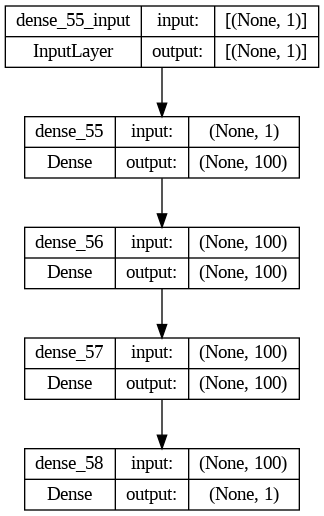

In [98]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes = True, show_layer_names=True)

In [99]:
y_preds = model.predict(X_test)
y_preds

1/1 [==============================] - 0s 97ms/step


array([[ 68.62572],
       [ 72.63957],
       [ 76.65343],
       [ 80.66739],
       [ 84.70279],
       [ 88.7413 ],
       [ 92.78274],
       [ 96.82419],
       [100.86562],
       [104.90707]], dtype=float32)

In [100]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [107]:
df = abs(y_preds-y_test)
df

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 2,  6, 10, 14, 18, 22, 26, 30, 34, 38],
       [ 2,  2,  6, 10, 14, 18, 22, 26, 30, 34],
       [ 6,  2,  2,  6, 10, 14, 18, 22, 26, 30],
       [10,  6,  2,  2,  6, 10, 14, 18, 22, 26],
       [14, 10,  6,  2,  2,  6, 10, 14, 18, 22],
       [18, 14, 10,  6,  2,  2,  6, 10, 14, 18],
       [22, 18, 14, 10,  6,  2,  2,  6, 10, 14],
       [26, 22, 18, 14, 10,  6,  2,  2,  6, 10],
       [30, 26, 22, 18, 14, 10,  6,  2,  2,  6],
       [34, 30, 26, 22, 18, 14, 10,  6,  2,  2]], dtype=int32)>

In [ ]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_preds):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot the predictions in red (predictions were made on the test data)
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # Show the legend
  plt.legend();


plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_preds)

In [110]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 257ms/step - loss: 1.2590 - mae: 1.2590


[1.2590186595916748, 1.2590186595916748]

In [112]:
y_preds

array([[ 68.62572],
       [ 72.63957],
       [ 76.65343],
       [ 80.66739],
       [ 84.70279],
       [ 88.7413 ],
       [ 92.78274],
       [ 96.82419],
       [100.86562],
       [104.90707]], dtype=float32)

In [113]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [115]:
y_preds - y_test

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ -2,  -6, -10, -14, -18, -22, -26, -30, -34, -38],
       [  2,  -2,  -6, -10, -14, -18, -22, -26, -30, -34],
       [  6,   2,  -2,  -6, -10, -14, -18, -22, -26, -30],
       [ 10,   6,   2,  -2,  -6, -10, -14, -18, -22, -26],
       [ 14,  10,   6,   2,  -2,  -6, -10, -14, -18, -22],
       [ 18,  14,  10,   6,   2,  -2,  -6, -10, -14, -18],
       [ 22,  18,  14,  10,   6,   2,  -2,  -6, -10, -14],
       [ 26,  22,  18,  14,  10,   6,   2,  -2,  -6, -10],
       [ 30,  26,  22,  18,  14,  10,   6,   2,  -2,  -6],
       [ 34,  30,  26,  22,  18,  14,  10,   6,   2,  -2]], dtype=int32)>

Buliding differnt models for experimentation

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Replicate original model
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# Fit the model
model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

1/1 [==============================] - 0s 68ms/step


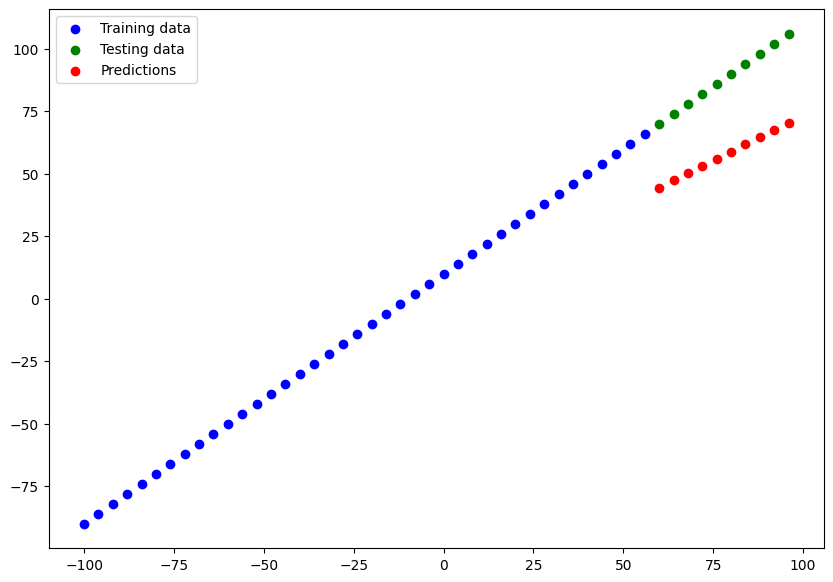

In [117]:
# Make and plot predictions for model_1
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [119]:


def mae(y_test, y_pred):
  """
  Calculuates mean absolute error between y_test and y_preds.
  """
  return tf.metrics.mean_absolute_error(y_test,
                                        y_pred)

def mse(y_test, y_pred):
  """
  Calculates mean squared error between y_test and y_preds.
  """
  return tf.metrics.mean_squared_error(y_test,
                                       y_pred)

In [120]:

# Calculate model_1 metrics
mae_1 = mae(y_test, y_preds_1.squeeze()).numpy()
mse_1 = mse(y_test, y_preds_1.squeeze()).numpy()
mae_1, mse_1

(30.538, 942.9212)

Build model2

In [121]:


# Set random seed
tf.random.set_seed(42)

# Replicate model_1 and add an extra layer
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1) # add a second layer
])

# Compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# Fit the model
model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0)

In [124]:
model_2.summary()

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_60 (Dense)            (None, 1)                 2         
                                                                 
 dense_61 (Dense)            (None, 1)                 2         
                                                                 
Total params: 4 (16.00 Byte)
Trainable params: 4 (16.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


1/1 [==============================] - 0s 52ms/step


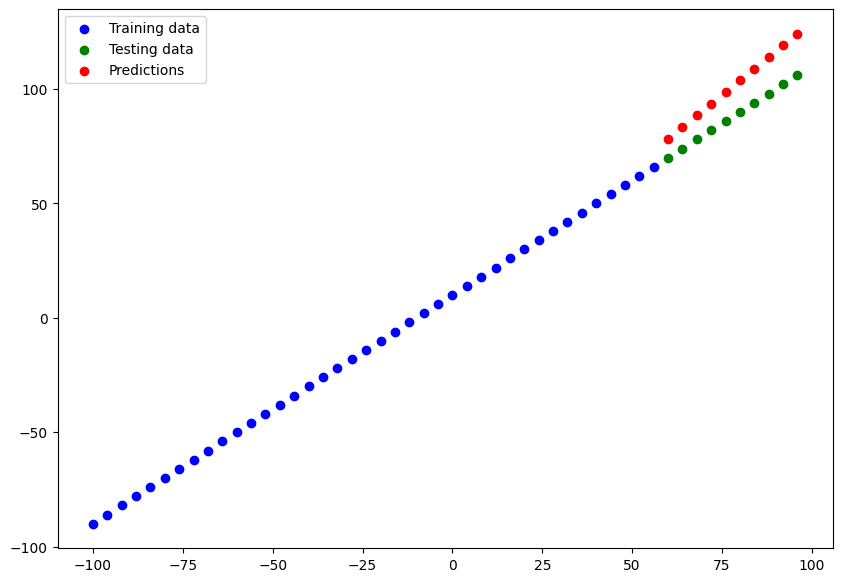

In [125]:
# Make and plot predictions for model_2
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [126]:
# Calculate model_2 metrics
mae_2 = mae(y_test, y_preds_2.squeeze()).numpy()
mse_2 = mse(y_test, y_preds_2.squeeze()).numpy()
mae_2, mse_2

(13.2133465, 184.56055)

Building model 3

In [143]:
tf.random.set_seed(42)

# Replicate model_2
model_4 = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1)
])

# Compile the model
model_4.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# Fit the model (this time for 500 epochs, not 100)
model_4.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0) # set verbose to 0 for less output



1/1 [==============================] - 0s 82ms/step


(79.12956, 6364.441)

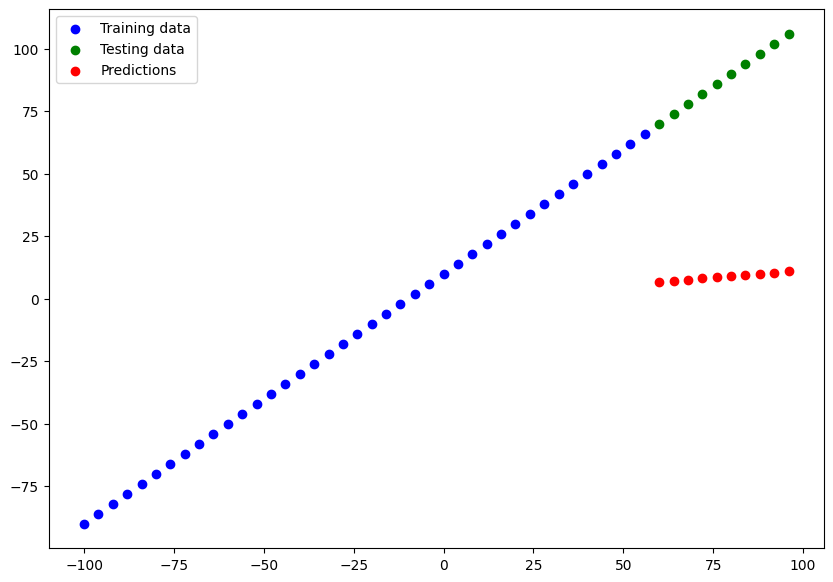

In [144]:
import numpy as np

# Example reshaping X_test
X_test_reshaped = np.expand_dims(X_test, axis=1)  # Assuming X_test is a one-dimensional array

# Now, you can use X_test_reshaped to make predictions
y_preds_3 = model_4.predict(X_test_reshaped)
plot_predictions(predictions=y_preds_3)



# Calculate model_3 metrics
mae_3 = mae(y_test, y_preds_3.squeeze()).numpy()
mse_3 = mse(y_test, y_preds_3.squeeze()).numpy()
mae_3, mse_3

In [145]:
model_results = [["model_1", mae_1, mse_1],
                 ["model_2", mae_2, mse_2],
                 ["model_3", mae_3, mae_3]]

In [146]:

import pandas as pd
all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,30.538000,942.921204
1,model_2,13.213346,184.560547
2,model_3,79.129562,79.129562


Training new model

In [ ]:
tf.random.set_seed(42)
# Create a model  using the Sequential API
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

# Compile the model

model_5.compile(loss= tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(learning_rate = 1e-3),
              metrics = ["mae"])

# Reshape X to have two dimensions
X_reshaped = tf.reshape(X, (-1, 1))  # Assuming you have one feature per sample

# Fit the model with the reshaped input data
start = time.time()
model_5.fit(X_reshaped, y, epochs=150)
end = time.time()
print(f"Total training time: {(end-start)/60} minutes")



1/1 [==============================] - 0s 84ms/step


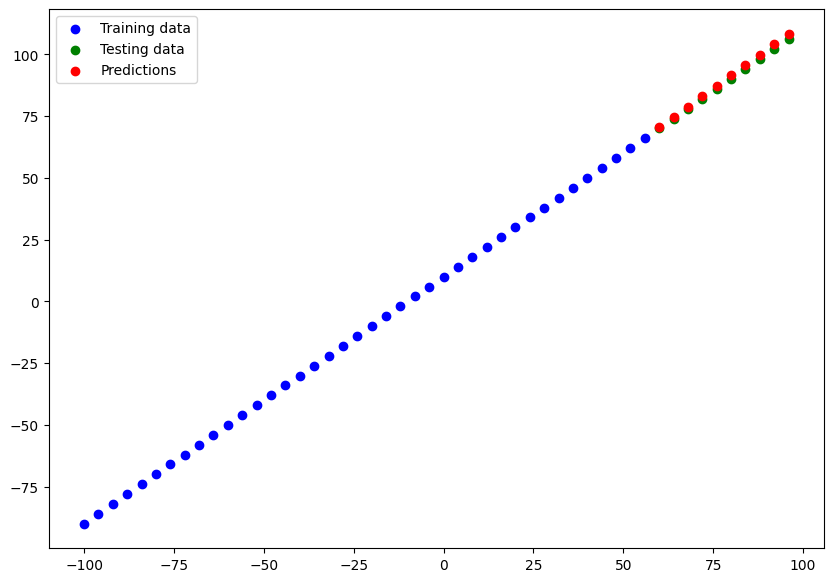

In [148]:
import numpy as np

# Example reshaping X_test
X_test_reshaped = np.expand_dims(X_test, axis=1)  # Assuming X_test is a one-dimensional array

# Now, you can use X_test_reshaped to make predictions
y_preds_5 = model_5.predict(X_test_reshaped)
plot_predictions(predictions=y_preds_5)

In [149]:
# Calculate model_3 metrics
mae_5 = mae(y_test, y_preds_5.squeeze()).numpy()
mse_5 = mse(y_test, y_preds_5.squeeze()).numpy()
mae_5, mse_5

(1.3862549, 2.2722642)

Comparing and Tracking multiple experiments

You want to start with small experiments(small models) and incrase them as needed

In [150]:
model_5.save('best_model_SavedModel_format')


In [151]:
!ls best_model_SavedModel_format


assets	fingerprint.pb	keras_metadata.pb  saved_model.pb  variables


In [152]:
model_5.save("best_model_HDF5_format.h5") # note the addition of '.h5' on the end


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [155]:


# Load a model from the SavedModel format
loaded_saved_model = tf.keras.models.load_model("best_model_SavedModel_format")
loaded_saved_model.summary()

Model: "sequential_38"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_82 (Dense)            (None, 100)               200       
                                                                 
 dense_83 (Dense)            (None, 100)               10100     
                                                                 
 dense_84 (Dense)            (None, 100)               10100     
                                                                 
 dense_85 (Dense)            (None, 1)                 101       
                                                                 
Total params: 20501 (80.08 KB)
Trainable params: 20501 (80.08 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [157]:

# Load a model from the HDF5 format
loaded_h5_model = tf.keras.models.load_model("best_model_HDF5_format.h5")
loaded_h5_model.summary()

Model: "sequential_38"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_82 (Dense)            (None, 100)               200       
                                                                 
 dense_83 (Dense)            (None, 100)               10100     
                                                                 
 dense_84 (Dense)            (None, 100)               10100     
                                                                 
 dense_85 (Dense)            (None, 1)                 101       
                                                                 
Total params: 20501 (80.08 KB)
Trainable params: 20501 (80.08 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Preparing a dataset

In [158]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")


In [159]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [162]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Create column transformer (this will help us normalize/preprocess our data)
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # get all values between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

# Create X & y
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

# Build our train and test sets (use random state to ensure same split as before)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit column transformer on the training data only (doing so on test data would result in data leakage)
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScalar) and one hot encoding (OneHotEncoder)
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [171]:
tf.random.set_seed(42)

# Build the model (3 layers, 100, 10, 1 units)
insurance_model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

# Compile the model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['mae'])

# Fit the model for 200 epochs (same as insurance_model_2)
insurance_model_3.fit(X_train_normal, y_train, epochs=500)

Epoch 1/500
34/34 [==============================] - 2s 4ms/step - loss: 13340.8633 - mae: 13340.8633
Epoch 2/500
34/34 [==============================] - 0s 3ms/step - loss: 13251.0039 - mae: 13251.0039
Epoch 3/500
34/34 [==============================] - 0s 3ms/step - loss: 12559.5986 - mae: 12559.5986
Epoch 4/500
34/34 [==============================] - 0s 4ms/step - loss: 10152.4268 - mae: 10152.4268
Epoch 5/500
34/34 [==============================] - 0s 3ms/step - loss: 8126.0142 - mae: 8126.0142
Epoch 6/500
34/34 [==============================] - 0s 3ms/step - loss: 7812.0020 - mae: 7812.0020
Epoch 7/500
34/34 [==============================] - 0s 3ms/step - loss: 7567.1255 - mae: 7567.1255
Epoch 8/500
34/34 [==============================] - 0s 3ms/step - loss: 7308.2773 - mae: 7308.2773
Epoch 9/500
34/34 [==============================] - 0s 3ms/step - loss: 7008.4478 - mae: 7008.4478
Epoch 10/500
34/34 [==============================] - 0s 3ms/step - loss: 6632.0142 - mae: 6

In [172]:
insurance_model_3_loss, insurance_model_3_mae = insurance_model_3.evaluate(X_test_normal, y_test)


9/9 [==============================] - 0s 2ms/step - loss: 1720.4309 - mae: 1720.4309
